The below code contains working for problem 1 and 2

In [3]:
"""importing required libraries"""
import random
from math import cos,pi
import copy
import sys
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from numpy.random import rand,choice
import math
import matplotlib as mpl

In [4]:
"""Fitness functions"""
def rastrigin_function(pos):
    fitness_val = 0.0
    for i in range(len(pos)):
        x_i = pos[i]
        fitness_val += 10 + (x_i * x_i) - (10 * cos(2 * pi * x_i))
    return fitness_val

def sphere_function(pos):
        fitness_val = 0.0
        for i in range(len(pos)):
            x_i = pos[i]
            fitness_val += (x_i * x_i)
        return fitness_val 

In [5]:
class Particle:
    def __init__(self, fitness, dim, minn, maxx, seed):
        #get a random seed value
        self.rand = random.Random(seed)
        #create list containing 0.0 values for particles position for all dimensions
        self.position = self.get_list(dim)
        #create list containing 0.0 values for particles position for all dimensions
        self.velocity = self.get_list(dim)
        #calculate random position and velocity for all dimensions
        for i in range(dim):
            range_ = maxx - minn
            rand_ = self.rand.random()
            self.position[i] = self.velocity[i] = ((range_ * rand_) + minn)
        #calculate fitness of particle for a given position
        if fitness == "rastrigin_function":
            self.fitness = rastrigin_function(self.position) 
        elif fitness == "sphere_function":
            self.fitness = sphere_function(self.position) 
        #initialize best position
        self.best_position_particle = copy.copy(self.position)
        #initialize best fitness value
        self.best_fitness_particle = self.fitness 
    
    """function to create a list of lists of 0.0 values for n dimensions"""
    def get_list(self,dim):
        l = []
        for i in range(dim):
            l.append(0.0)
        return l

In [6]:
class ParticleSwarmOptimization:
    def __init__(self,w,a,n,dim,minx,maxx):
        #initialize value of hyperparameter w
        self.w = w
        #initialize values of cognitive and coefficient as a1 = a2
        self.a1 = self.a2 = a
        #initialize dimension
        self.dim = dim
        #initialize the number of particles
        self.num_particles = n
        #initialize the lower bound
        self.min = minx
        #initialize the upper bound
        self.max = maxx
        
    """function to create list of n number particles"""
    def create_nparticles(self,fitness):
        swarn_part = []
        for i in range(self.num_particles):
            particle = Particle(fitness,self.dim, self.min, self.max,i)
            swarn_part.append(particle)
        return swarn_part
    
    """function to create a list of lists of 0.0 values for n dimensions"""
    def get_list(self):
        l = []
        for i in range(self.dim):
            l.append(0.0)
        return l
    
    """function to find the best position and fitness values """
    def get_best_particle_N_fitness(self,swarn_part):
        best_pos = self.get_list()
        best_fitness = float('inf')
        
        for i in range(self.num_particles): 
            if swarn_part[i].fitness < best_fitness:
                best_fitness = swarn_part[i].fitness
                best_pos = copy.copy(swarn_part[i].position)
        
        return best_pos,best_fitness
    
    """function to compute upadated velocity"""
    def compute_velocity(self,particle,index,best_pos):
        rnd = random.Random(0)
        w_ = self.w * particle.velocity[index]
        a1_ = self.a1 * rnd.random() * (particle.best_position_particle[index] - particle.position[index])
        a2_ = self.a2 * rnd.random() * (best_pos[index] - particle.position[index])
        res = w_ + a1_ + a2_
        return res
    
    """function to update position of the particle by adding velocity of the particle"""
    def compute_position(self,particle):
        for i in range(self.dim):
            particle.position[i] += particle.velocity[i]
    
    """function to check if we have got a better fitness value for the particle"""
    def check_new_best_particle(self,particle):
        if particle.fitness < particle.best_fitness_particle:
            return True
        return False
    
    """function for particle swarm optimization for task 1"""
    def pso_task1(self,fitness_function):
        #counter to check if there fitness value of a particle is repeated
        particle_counter = 0
        #counter to check if there fitness value of a particle is repeated for iterations
        iteration_counter = 0
        #counter to check if  max iterations have been reached
        iterr = 0
        
        #list of all the n number of particles
        swarm_of_particles = self.create_nparticles(fitness_function)
        #getting the best position and fitness values of all the particles in a swarm
        best_pos,best_fitness = self.get_best_particle_N_fitness(swarm_of_particles)
        #setting the maximum value of previous best fitness
        prev_best_fitness = float('inf')

        #while we have't reached global minimum
        while True:
            #making the particle counter zero for each iteration
            particle_counter = 0

            #if the fitness values repeat we incerement our counter
            if best_fitness == prev_best_fitness:
                iteration_counter += 1
            
            #if fitness values repeat for more than 3 iterations we break the pso algorithm
            if iteration_counter > 3:
                print("Best solution found at iteration : ",iterr)
                break
                
            #for all the n particles
            for i in range(self.num_particles):
                #for all the k dimensions
                for k in range(self.dim):
                    #computing the updated velocity
                    swarm_of_particles[i].velocity[k] = self.compute_velocity(swarm_of_particles[i],k,best_pos)
                    #if velocity is less than the min bound we update the value
                    if swarm_of_particles[i].velocity[k] < self.min:
                        swarm_of_particles[i].velocity[k] = self.min
                    #if velocity is greater than the max bound we update the value
                    elif swarm_of_particles[i].velocity[k] > self.max:
                        swarm_of_particles[i].velocity[k] = self.max

                #computing the updated position
                self.compute_position(swarm_of_particles[i])
                #calculating the fitness values based on the function we are using
                if fitness_function == "rastrigin_function":
                    swarm_of_particles[i].fitness = rastrigin_function(swarm_of_particles[i].position)
                elif fitness_function == "sphere_function":
                    swarm_of_particles[i].fitness = sphere_function(swarm_of_particles[i].position)

                #checking if the new position is a new best position for the particle
                #if it is we update the position and fitness values of the particle
                if self.check_new_best_particle(swarm_of_particles[i]):
                    swarm_of_particles[i].best_fitness_particle = swarm_of_particles[i].fitness
                    swarm_of_particles[i].best_position_particle = copy.copy(swarm_of_particles[i].position)
                
                #if current particle fitness is equal to the best overall fitness increment the counter
                if swarm_of_particles[i].fitness == best_fitness:
                    particle_counter += 1
                
                #if particle fitness repeated more than thrice we break the pso search and move to next iteration
                if particle_counter > 3:
                    #update the value of previous best fitness
                    prev_best_fitness = best_fitness
                    break

                #checking if the new position is a overall best position for the particle
                #if it is we update the position and fitness values of the particle
                if swarm_of_particles[i].fitness < best_fitness:
                    #update the value of previous best fitness
                    prev_best_fitness = best_fitness
                    best_fitness = swarm_of_particles[i].fitness
                    best_pos = copy.copy(swarm_of_particles[i].position)
                
                if iterr == 5000:
                    print("No solution found within 5000 iterations returning the best solution")
                    return best_pos,iterr
                    
            #incrementing iteartion count
            iterr += 1
        #returning best position 
        return best_pos,iterr
    
    """function for particle swarm optimization for task 2"""
    def pso_task2(self,fitness_function,max_iter):
        #list to store the best fitness values
        best_fitness_values = []
        #counter to check if there fitness value of a particle is repeated
        particle_counter = 0
        #counter to check if there fitness value of a particle is repeated for iterations
        iteration_counter = 0
        #counter to check if  max iterations have been reached
        iterr = 0
        iter_runs = []

        #list of all the n number of particles
        swarm_of_particles = self.create_nparticles(fitness_function)
        #getting the best position and fitness values of all the particles in a swarm
        best_pos,best_fitness = self.get_best_particle_N_fitness(swarm_of_particles)
        #setting the maximum value of previous best fitness
        prev_best_fitness = float('inf')

        #while we have't reached the maximum iterations
        while iterr < max_iter:
            #making the particle counter zero for each iteration
            particle_counter = 0

            #if the fitness values repeat we incerement our counter
            if best_fitness == prev_best_fitness:
                iteration_counter += 1
            
            #if fitness values repeat for more than 3 iterations we break the pso algorithm
            if iteration_counter > 3:
                print("Best solution found at iteration : ",iterr)
                break
            
            #for all the n particles
            for i in range(self.num_particles):
                #for all the k dimensions
                for k in range(self.dim):
                    #computing the updated velocity
                    swarm_of_particles[i].velocity[k] = self.compute_velocity(swarm_of_particles[i],k,best_pos)
                    #if velocity is less than the min bound we update the value
                    if swarm_of_particles[i].velocity[k] < self.min:
                        swarm_of_particles[i].velocity[k] = self.min
                    #if velocity is greater than the max bound we update the value
                    elif swarm_of_particles[i].velocity[k] > self.max:
                        swarm_of_particles[i].velocity[k] = self.max

                #computing the updated position
                self.compute_position(swarm_of_particles[i])
                #calculating the fitness values based on the function we are using
                if fitness_function == "rastrigin_function":
                    swarm_of_particles[i].fitness = rastrigin_function(swarm_of_particles[i].position)
                elif fitness_function == "sphere_function":
                    swarm_of_particles[i].fitness = sphere_function(swarm_of_particles[i].position)

                #checking if the new position is a new best position for the particle
                #if it is we update the position and fitness values of the particle
                if self.check_new_best_particle(swarm_of_particles[i]):
                    swarm_of_particles[i].best_fitness_particle = swarm_of_particles[i].fitness
                    swarm_of_particles[i].best_position_particle = copy.copy(swarm_of_particles[i].position)
                
                #if current particle fitness is equal to the best overall fitness increment the counter
                if swarm_of_particles[i].fitness == best_fitness:
                    particle_counter += 1
                
                #if particle fitness repeated more than thrice we break the pso search and move to next iteration
                if particle_counter > 3:
                    #update the value of previous best fitness
                    prev_best_fitness = best_fitness
                    break

                #checking if the new position is a overall best position for the particle
                #if it is we update the position and fitness values of the particle
                if swarm_of_particles[i].fitness < best_fitness:
                    #update the value of previous best fitness
                    prev_best_fitness = best_fitness
                    best_fitness = swarm_of_particles[i].fitness
                    best_pos = copy.copy(swarm_of_particles[i].position)
                    #adding the fitness value obtained to best fitness list 
                    best_fitness_values.append(best_fitness)
                    iter_runs.append(iterr)
                    
            #incrementing iteartion count
            iterr += 1
        #returning best position and best fitness values
        return best_pos,best_fitness_values,iter_runs

In [7]:
def plott(best_fitness,fitness_runs):
    plt.style.use('seaborn')
    plt.plot(fitness_runs, best_fitness, color='green', label='fitness',marker='o', lw=3) # line
    title = "Fitness value per run"
    plt.title(title, fontsize=14)
    plt.legend()
    plt.xlabel('Generation', fontsize=14)
    plt.ylabel('Fitness Value', fontsize=14)
    plt.show()

Problem 1 

In [6]:
"""TASK 1"""
dim = 3
num_particles = 30
minn = -5.12 #min bound
maxx = 5.12 #max bound

fitness = "rastrigin_function" #fitnes function
w = 0.7 #inertia
a = 0.381 #cognitive coeff = social coeff
PSO = ParticleSwarmOptimization(w,a,num_particles,dim,minn,maxx)
best_position,iterr= PSO.pso_task1(fitness)
print("Best solution found for ",dim," dimensions is --- :")
print([best_position[i] for i in range(dim)])
print("Fitness of best solution is: ",rastrigin_function(best_position))

print()

fitness = "sphere_function" #fitnes function
w = 0.5 #inertia
a = 0.381 #cognitive coeff = social coeff
PSO = ParticleSwarmOptimization(w,a,num_particles,dim,minn,maxx)
best_position,iterr= PSO.pso_task1(fitness)
print("Best solution found for ",dim," dimensions is --- :")
print([best_position[i] for i in range(dim)])
print("Fitness of best solution is: ",sphere_function(best_position))

Best solution found at iteration :  118
Best solution found for  3  dimensions is --- :
[-8.328166718978889e-10, -2.2780787454319183e-09, 0.9949586379808055]
Fitness of best solution is:  0.9949590570932916

Best solution found at iteration :  1060
Best solution found for  3  dimensions is --- :
[-8.673557188733125e-163, 1.3217444142939557e-162, -1.1096872608347019e-162]
Fitness of best solution is:  0.0


Problem 2

Best solution found for  3  dimensions is --- :
[0.9949580955114922, 1.9899127357981665, 0.9949587315850962]
Fitness of best solution is:  5.969749304850616


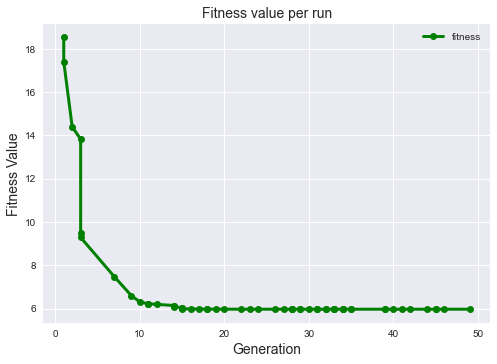


Best solution found for  3  dimensions is --- :
[-7.914501477055208e-10, -1.8216882565343716e-09, -3.1805543007734427e-09]
Fitness of best solution is:  3.552713678800501e-15


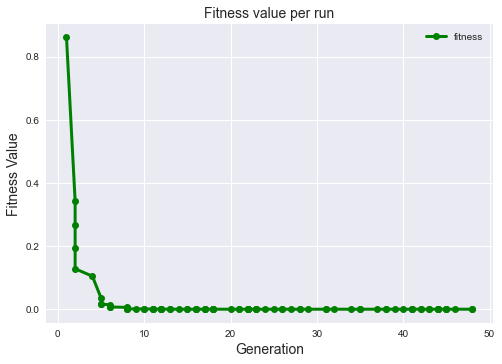

In [7]:
"""TASK 2"""
dim = 3
num_particles = 30
max_iter = 50
minn = -5.12 #min bound
maxx = 5.12 #max bound

fitness = "rastrigin_function" #fitnes function
w = 0.6 #inertia
a = 0.381 #cognitive coeff = social coeff
PSO = ParticleSwarmOptimization(w,a,num_particles,dim,minn,maxx)
best_position,best_fitness,iteration_runs= PSO.pso_task2(fitness,max_iter)
print("Best solution found for ",dim," dimensions is --- :")
print([best_position[i] for i in range(dim)])
print("Fitness of best solution is: ",rastrigin_function(best_position))
plott(best_fitness,iteration_runs)
print()

fitness = "sphere_function" #fitnes function
w = 0.5 #inertia
a = 0.618 #cognitive coeff = social coeff
PSO = ParticleSwarmOptimization(w,a,num_particles,dim,minn,maxx)
best_position,best_fitness,iteration_runs= PSO.pso_task2(fitness,max_iter)
print("Best solution found for ",dim," dimensions is --- :")
print([best_position[i] for i in range(dim)])
print("Fitness of best solution is: ",sphere_function(best_position))
plott(best_fitness,iteration_runs)

E:\Anaconda\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


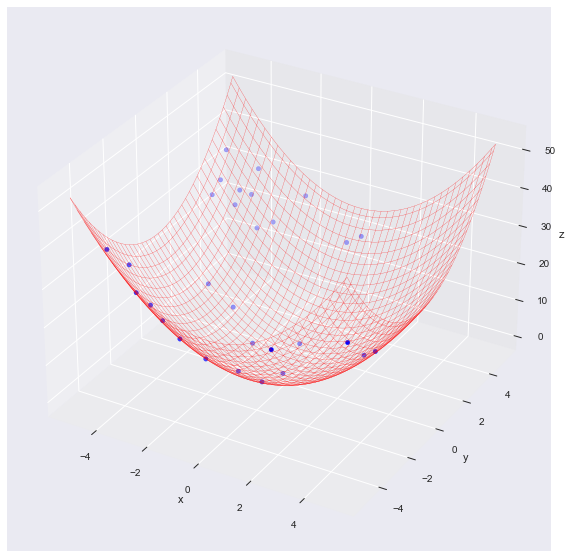

In [8]:
"""VISUALISATION"""
def sphere_fitness_function(x1,x2):
    res = x1**2 + x2**2
    return res

def create_pop(minn,maxx,dim,num_particles):
    population = []
    for i in range(num_particles):
        pop = []
        for j in range(dim):
            pop.append(random.uniform(minn, maxx))
        population.append(pop)
    return population

def get_all_fitness(population,num_particles):
    fitness_values = []
    for n in range(num_particles):
        fit = sphere_fitness_function(population[n][0],population[n][1])
        fitness_values.append(fit)
    return fitness_values

def get_indiv_population(population,num_particles,index):
    pop = []
    for i in range(num_particles):
        pop.append(population[i][index])
    return pop

def plot_3D(population,num_particles):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    x = np.linspace(minn, maxx, 80)
    y = np.linspace(minn, maxx, 80)
    X, Y = np.meshgrid(x, y)
    Z= sphere_fitness_function(X,Y)
    ax.plot_wireframe(X, Y, Z, color='r', linewidth=0.2)

    images = []
    allFitness = get_all_fitness(population,num_particles)
    x1 = get_indiv_population(population,num_particles,0)
    x2 = get_indiv_population(population,num_particles,1)
    image = ax.scatter3D(x1,x2,allFitness, c='b')
    images.append([image])
    # Generate the animation image and save
    animated_image = animation.ArtistAnimation(fig, images)

population = create_pop(minn,maxx,dim,num_particles)
plot_3D(population,num_particles)


In [9]:
"""FINDING THE APPROPRIATE PARAMETER VALUES"""
inertia = [round(random.uniform(0.51, 0.91),2) for _ in range(20)]
coeff = [round(random.uniform(0.51, 1.51),2) for _ in range(20)]
rast_fitness = []
sphere_fitness = []
rast_iter = []
sphere_iter = []
dim = 3
num_particles = 30
minn = -5.12 #min bound
maxx = 5.12 #max bound

print("inertia ",inertia)
print("coeff ",coeff)
print()
fitness = "rastrigin_function"
print("<--- Finding the parameter values for rastrigin function --->")
for i in range(0,len(inertia)):
    for j in range(len(coeff)):
        PSO = ParticleSwarmOptimization(inertia[i],coeff[j],num_particles,dim,minn,maxx)
        best_position,iterr= PSO.pso_task1(fitness)
        rast_fitness.append(rastrigin_function(best_position))
        rast_iter.append(iterr)

print()
fitness = "sphere_function"
print("<--- Finding the parameter values for sphere function --->")
for i in range(0,len(inertia)):
    for j in range(len(coeff)):
        PSO = ParticleSwarmOptimization(inertia[i],coeff[j],num_particles,dim,minn,maxx)
        best_position,iterr= PSO.pso_task1(fitness)
        sphere_fitness.append(sphere_function(best_position))
        sphere_iter.append(iterr)

inertia  [0.57, 0.56, 0.87, 0.66, 0.65, 0.68, 0.86, 0.87, 0.71, 0.57, 0.87, 0.87, 0.53, 0.81, 0.78, 0.9, 0.75, 0.9, 0.62, 0.61]
coeff  [1.12, 0.69, 1.3, 0.93, 1.47, 1.24, 0.85, 0.99, 0.79, 0.62, 0.77, 1.31, 1.16, 0.78, 0.65, 1.31, 0.8, 1.25, 1.38, 0.99]

<--- Finding the parameter values for rastrigin function --->
No solution found within 5000 iterations returning the best solution
Best solution found at iteration :  80
No solution found within 5000 iterations returning the best solution
Best solution found at iteration :  75
Best solution found at iteration :  124
No solution found within 5000 iterations returning the best solution
No solution found within 5000 iterations returning the best solution
No solution found within 5000 iterations returning the best solution
Best solution found at iteration :  126
Best solution found at iteration :  103
No solution found within 5000 iterations returning the best solution
No solution found within 5000 iterations returning the best solution
No

No solution found within 5000 iterations returning the best solution
No solution found within 5000 iterations returning the best solution
Best solution found at iteration :  279
Best solution found at iteration :  294
Best solution found at iteration :  297
Best solution found at iteration :  288
Best solution found at iteration :  319
No solution found within 5000 iterations returning the best solution
Best solution found at iteration :  297
No solution found within 5000 iterations returning the best solution
No solution found within 5000 iterations returning the best solution
Best solution found at iteration :  295
No solution found within 5000 iterations returning the best solution
Best solution found at iteration :  143
No solution found within 5000 iterations returning the best solution
No solution found within 5000 iterations returning the best solution
No solution found within 5000 iterations returning the best solution
Best solution found at iteration :  128
No solution found w

No solution found within 5000 iterations returning the best solution
No solution found within 5000 iterations returning the best solution
Best solution found at iteration :  482
Best solution found at iteration :  410
Best solution found at iteration :  417
Best solution found at iteration :  371
No solution found within 5000 iterations returning the best solution
Best solution found at iteration :  410
Best solution found at iteration :  245
No solution found within 5000 iterations returning the best solution
Best solution found at iteration :  359
Best solution found at iteration :  795
Best solution found at iteration :  388
No solution found within 5000 iterations returning the best solution
No solution found within 5000 iterations returning the best solution
No solution found within 5000 iterations returning the best solution
Best solution found at iteration :  388
Best solution found at iteration :  349
Best solution found at iteration :  470
Best solution found at iteration :  3

Best solution found at iteration :  3633
Best solution found at iteration :  1158
Best solution found at iteration :  1516
Best solution found at iteration :  1685
Best solution found at iteration :  1925
Best solution found at iteration :  1659
Best solution found at iteration :  4305
Best solution found at iteration :  2695
Best solution found at iteration :  1660
Best solution found at iteration :  1918
Best solution found at iteration :  4305
Best solution found at iteration :  1713
Best solution found at iteration :  3425
Best solution found at iteration :  4807
Best solution found at iteration :  1516
Best solution found at iteration :  2322
Best solution found at iteration :  1802
Best solution found at iteration :  3963
Best solution found at iteration :  1283
No solution found within 5000 iterations returning the best solution
Best solution found at iteration :  3442
Best solution found at iteration :  1141
Best solution found at iteration :  1494
Best solution found at iterat

No solution found within 5000 iterations returning the best solution
No solution found within 5000 iterations returning the best solution
Best solution found at iteration :  4847
No solution found within 5000 iterations returning the best solution
No solution found within 5000 iterations returning the best solution
No solution found within 5000 iterations returning the best solution
No solution found within 5000 iterations returning the best solution
Best solution found at iteration :  2022
No solution found within 5000 iterations returning the best solution
Best solution found at iteration :  4841
Best solution found at iteration :  1633
Best solution found at iteration :  1119
Best solution found at iteration :  1952
Best solution found at iteration :  1111
Best solution found at iteration :  2035
Best solution found at iteration :  1917
Best solution found at iteration :  1110
Best solution found at iteration :  1449
Best solution found at iteration :  1141
Best solution found at it

In [10]:
def convert(listA, len_2d):
    res = []
    idx = 0
    for var_len in len_2d:
        res.append(listA[idx: idx + var_len])
        idx += var_len
    return res

In [18]:
def display_heatmap(sp_fit,coeff,inertia,title):
    sp_fit = np.array(sp_fit)
    fig, ax = plt.subplots(figsize=(20,20))
    im = ax.imshow(sp_fit)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(coeff)))
    ax.set_yticks(np.arange(len(inertia)))
    ax.set_xticklabels(coeff)
    ax.set_yticklabels(inertia)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="right",
             rotation_mode="anchor")
    plt.xlabel('Coefficient',fontsize=24)
    plt.ylabel('Inertia',fontsize=24)

    # Loop over data dimensions and create text annotations.
    for i in range(len(inertia)):
        for j in range(len(coeff)):
            if sp_fit[i][j] == 5000:
                text = ax.text(j, i, sp_fit[i, j],
                           ha="center", va="center", color="b")
            else:
                text = ax.text(j, i, sp_fit[i, j],
                           ha="center", va="center", color="w")

    ax.set_title(title,fontsize=24)
    fig.tight_layout()
    plt.show()

In [31]:
# sphere_fitnesss = [round(sphere_fitness[i],2) for i in range(len(sphere_fitness))]
rast_fitnesss = [round(rast_fitness[i],2) for i in range(len(rast_fitness))]
list_2d = [20 for i in range(20)]
sp_fit = convert(sphere_fitness, list_2d)
rt_fit =  convert(rast_fitnesss, list_2d)
sp_iter = convert(rast_iter, list_2d)
rt_iter = convert(sphere_iter, list_2d)

Heatmap for Rastrigin function


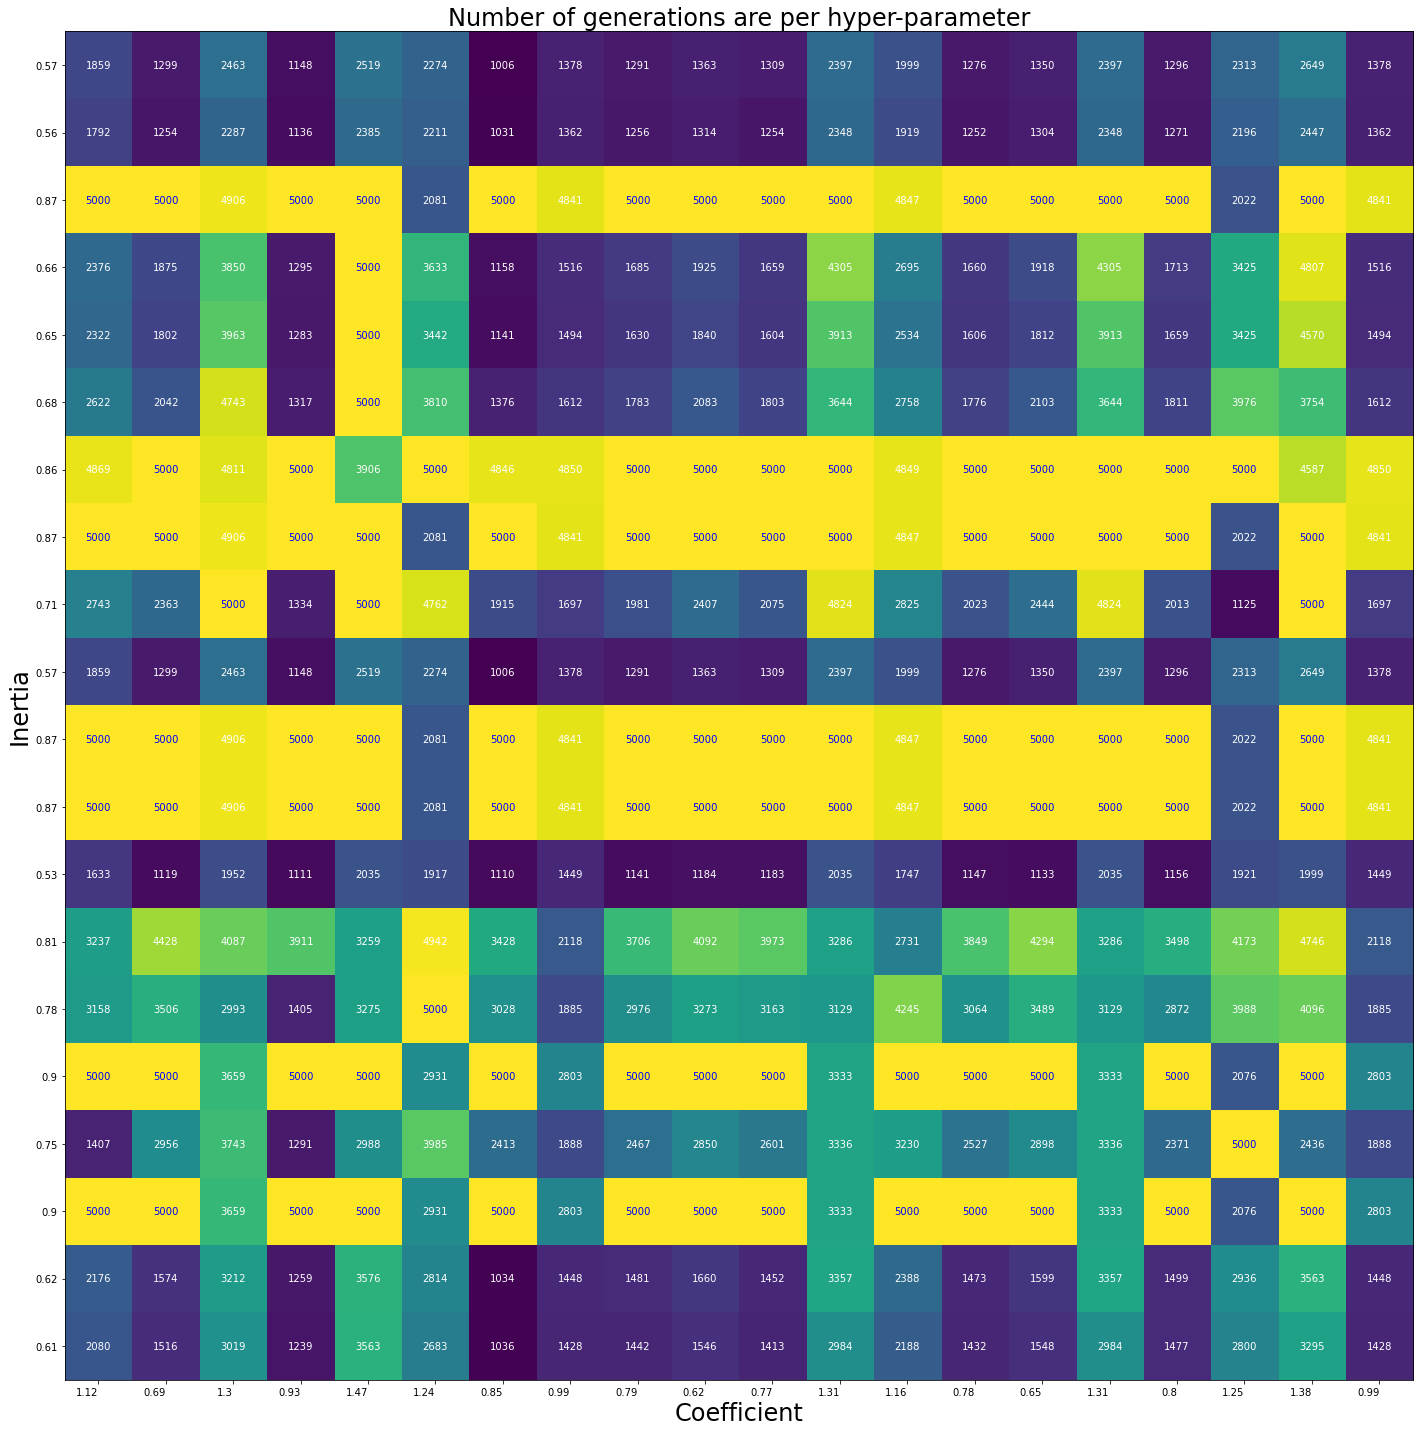

In [20]:
print("Heatmap for Rastrigin function")
title = "Number of generations are per hyper-parameter"
display_heatmap(rt_iter,coeff,inertia,title)

Heatmap for Sphere function


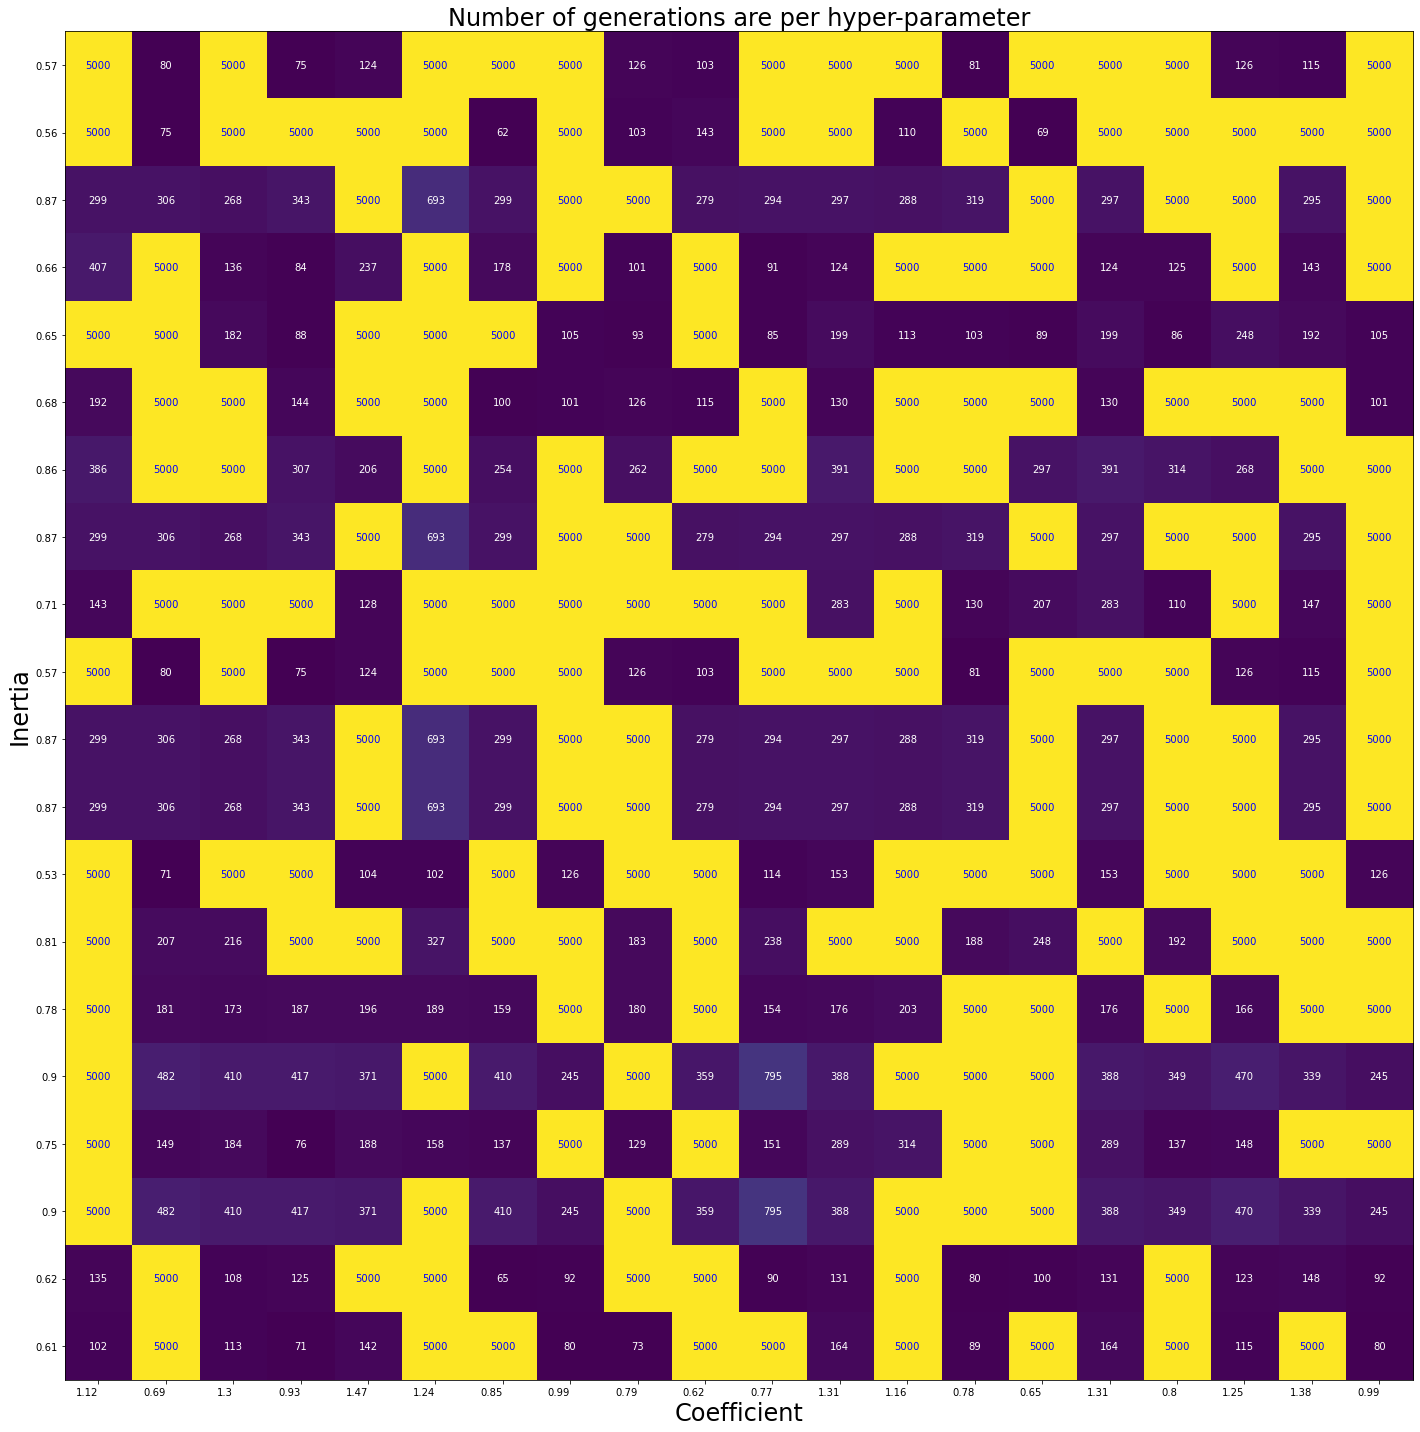

In [21]:
print("Heatmap for Sphere function")
title = "Number of generations are per hyper-parameter"
display_heatmap(sp_iter,coeff,inertia,title)

Heatmap for Rastrigin function


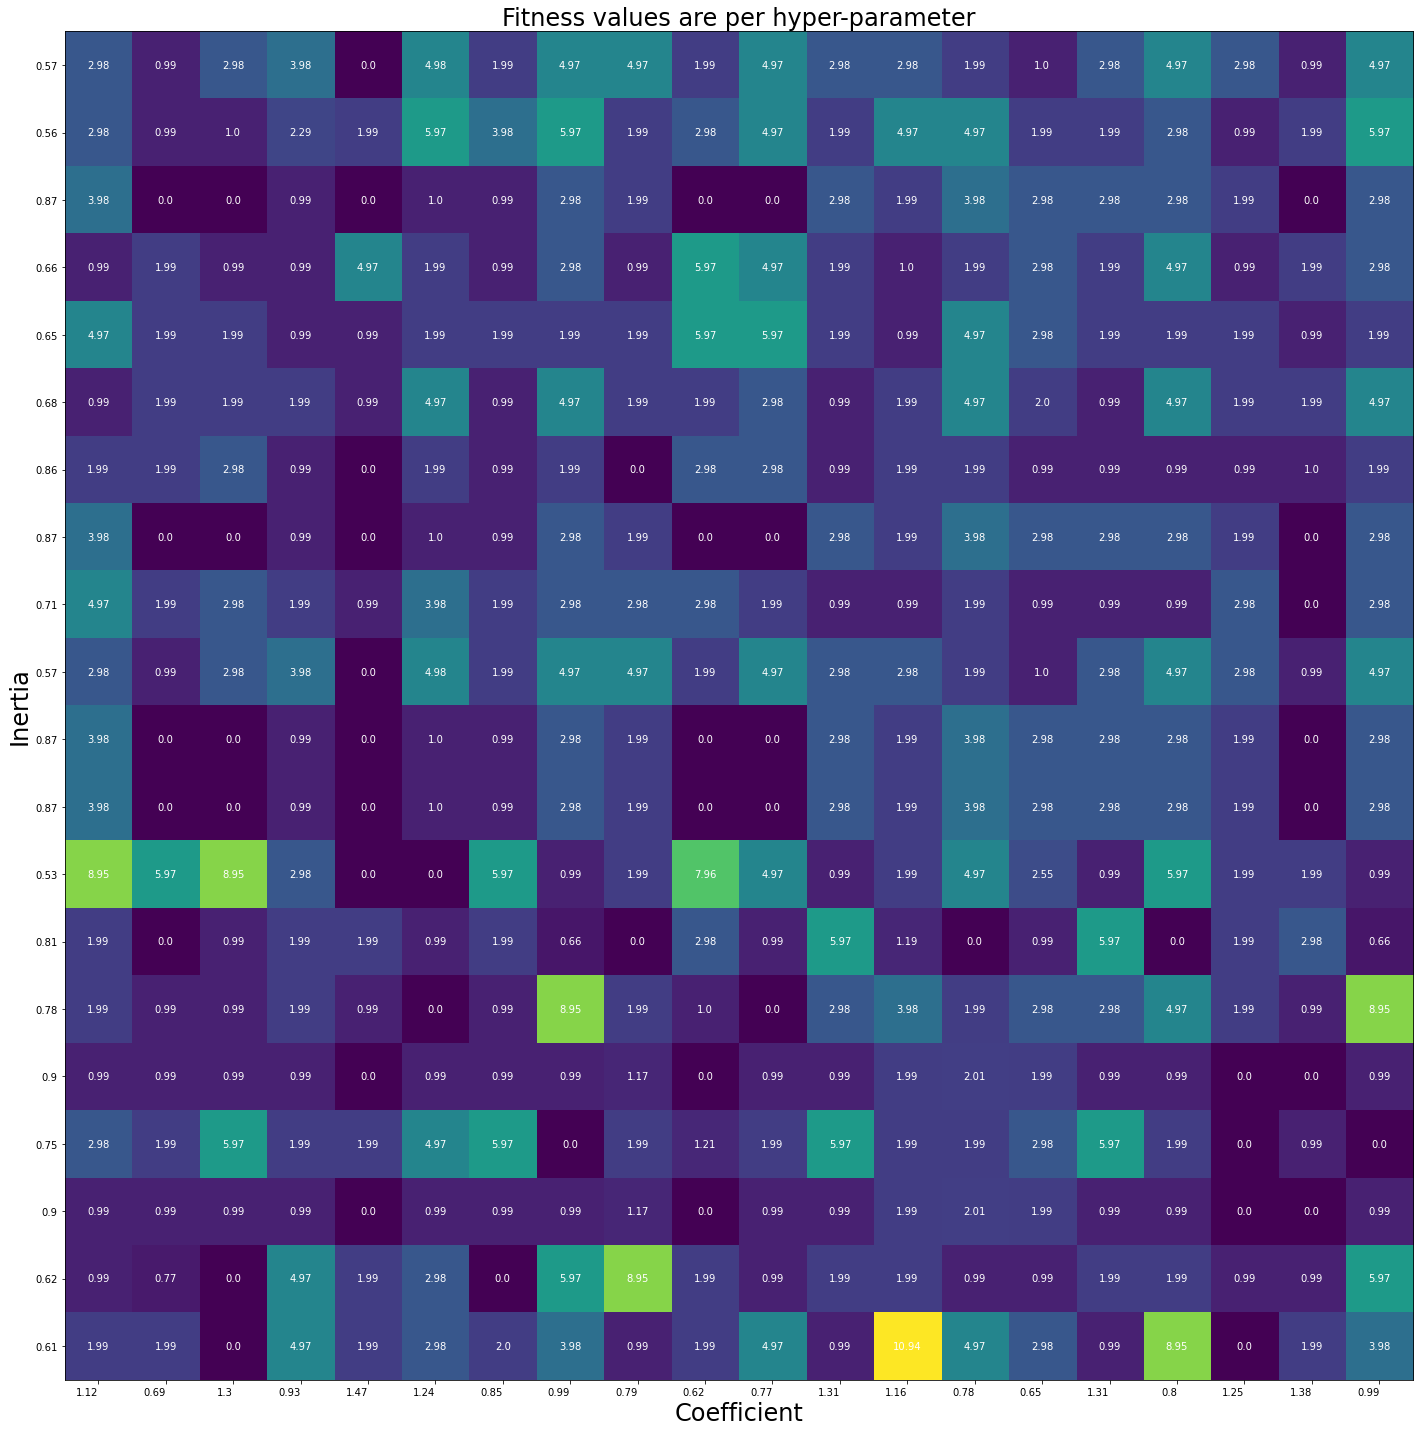

In [29]:
print("Heatmap for Rastrigin function")
title = "Fitness values are per hyper-parameter"
display_heatmap(rt_fit,coeff,inertia,title)

Below code contains working for problem 3

In [4]:
class Particle:
    def __init__(self,dim, minn, maxx, seed):
        #get a random seed value
        self.rand = random.Random(seed)
        #create list containing 0.0 values for particles position for all dimensions
        self.position = self.get_list(dim)
        #create list containing 0.0 values for particles position for all dimensions
        self.velocity = self.get_list(dim)
        #calculate random position and velocity for all dimensions
        for i in range(dim):
            range_ = maxx - minn
            rand_ = self.rand.random()
            self.position[i] = self.velocity[i] = ((range_ * rand_) + minn)
        self.fitness = rastrigin_function(self.position)  
        #initialize best position
        self.best_position_particle = copy.copy(self.position)
        #initialize best fitness value
        self.best_fitness_particle = self.fitness 
    
    """function to create a list of lists of 0.0 values for n dimensions"""
    def get_list(self,dim):
        l = []
        for i in range(dim):
            l.append(0.0)
        return l

In [9]:
class ParticleSwarmOptimization:
    def __init__(self,n,dim,minx,maxx):
        #initialize dimension
        self.dim = dim
        #initialize the number of particles
        self.num_particles = n
        #initialize the lower bound
        self.min = minx
        #initialize the upper bound
        self.max = maxx
        
    """function to create list of n number particles"""
    def create_nparticles(self):
        swarn_part = []
        for i in range(self.num_particles):
            particle = Particle(self.dim, self.min, self.max,i)
            swarn_part.append(particle)
        return swarn_part
    
    """function to create a list of lists of 0.0 values for n dimensions"""
    def get_list(self):
        l = []
        for i in range(self.dim):
            l.append(0.0)
        return l
    
    """function to find the best position and fitness values """
    def get_best_particle_N_fitness(self,swarn_part):
        best_pos = self.get_list()
        best_fitness = float('inf')
        
        for i in range(self.num_particles): 
            if swarn_part[i].fitness < best_fitness:
                best_fitness = swarn_part[i].fitness
                best_pos = copy.copy(swarn_part[i].position)
        
        return best_pos,best_fitness
    
    """function to compute upadated velocity"""
    def compute_velocity(self,w,a1,a2,particle,index,best_pos):
        rnd = random.Random(0)
        w_ = w * particle.velocity[index]
        a1_ = a1 * rnd.random() * (particle.best_position_particle[index] - particle.position[index])
        a2_ = a2 * rnd.random() * (best_pos[index] - particle.position[index])
        res = w_ + a1_ + a2_
        return res
    
    """function to update position of the particle by adding velocity of the particle"""
    def compute_position(self,particle):
        for i in range(self.dim):
            particle.position[i] += particle.velocity[i]
    
    """function to check if we have got a better fitness value for the particle"""
    def check_new_best_particle(self,particle):
        if particle.fitness < particle.best_fitness_particle:
            return True
        return False
    """function for particle swarm optimization for task 2"""
    def pso_task2(self,w_1,a1_1,a2_1,w_2,a1_2,a2_2,max_iter):
        #list to store the best fitness values
        best_fitness_values = []
        iter_runs = []
        #counter to check if there fitness value of a particle is repeated
        particle_counter = 0
        #counter to check if there fitness value of a particle is repeated for iterations
        iteration_counter = 0
        #counter to check if  max iterations have been reached
        iterr = 0

        #list of all the n number of particles
        swarm_of_particles = self.create_nparticles()
        #getting the best position and fitness values of all the particles in a swarm
        best_pos,best_fitness = self.get_best_particle_N_fitness(swarm_of_particles)
        #setting the maximum value of previous best fitness
        prev_best_fitness = float('inf')
        
        if max_iter == 0:
            while True:
                #making the particle counter zero for each iteration
                particle_counter = 0

                #if the fitness values repeat we incerement our counter
                if best_fitness == prev_best_fitness:
                    iteration_counter += 1

                #if fitness values repeat for more than 3 iterations we break the pso algorithm
                if iteration_counter > 3:
                    print("Best solution found at iteration : ",iterr)
                    break

                N_by_2 = self.num_particles//2

                #for all the n particles
                for i in range(0,self.num_particles):
                    #for all the k dimensions
                    for k in range(self.dim):
                        #computing the updated velocity
                        #half population belongs to type1 and remaining belongs to type 2 
                        #if particles belong to type2 we use different values of inertia and coefficients
                        if i > N_by_2:
                            swarm_of_particles[i].velocity[k] = self.compute_velocity(w_2,a1_2,a2_2,swarm_of_particles[i],k,best_pos)
                        else:
                            swarm_of_particles[i].velocity[k] = self.compute_velocity(w_1,a1_1,a2_1,swarm_of_particles[i],k,best_pos)
                        #if velocity is less than the min bound we update the value
                        if swarm_of_particles[i].velocity[k] < self.min:
                            swarm_of_particles[i].velocity[k] = self.min
                        #if velocity is greater than the max bound we update the value
                        elif swarm_of_particles[i].velocity[k] > self.max:
                            swarm_of_particles[i].velocity[k] = self.max

                    #computing the updated position
                    self.compute_position(swarm_of_particles[i])
                    #calculating the fitness values based on the function we are using
                    swarm_of_particles[i].fitness = rastrigin_function(swarm_of_particles[i].position)

                    #checking if the new position is a new best position for the particle
                    #if it is we update the position and fitness values of the particle
                    if self.check_new_best_particle(swarm_of_particles[i]):
                        swarm_of_particles[i].best_fitness_particle = swarm_of_particles[i].fitness
                        swarm_of_particles[i].best_position_particle = copy.copy(swarm_of_particles[i].position)

                    #if current particle fitness is equal to the best overall fitness increment the counter
                    if swarm_of_particles[i].fitness == best_fitness:
                        particle_counter += 1

                    #if particle fitness repeated more than thrice we break the pso search and move to next iteration
                    if particle_counter > 3:
                        #update the value of previous best fitness
                        prev_best_fitness = best_fitness
                        break

                    #checking if the new position is a overall best position for the particle
                    #if it is we update the position and fitness values of the particle
                    if swarm_of_particles[i].fitness < best_fitness:
                        #update the value of previous best fitness
                        prev_best_fitness = best_fitness
                        best_fitness = swarm_of_particles[i].fitness
                        best_pos = copy.copy(swarm_of_particles[i].position)
                        #adding the fitness value obtained to best fitness list 
                        best_fitness_values.append(best_fitness)
                        iter_runs.append(iterr)

                #incrementing iteartion count
                iterr += 1
        else:
            #while we have't reached the maximum iterations
            while iterr < max_iter:
                #making the particle counter zero for each iteration
                particle_counter = 0

                #if the fitness values repeat we incerement our counter
                if best_fitness == prev_best_fitness:
                    iteration_counter += 1

                #if fitness values repeat for more than 3 iterations we break the pso algorithm
                if iteration_counter > 3:
                    print("Best solution found at iteration : ",iterr)
                    break

                N_by_2 = self.num_particles//2

                #for all the n particles
                for i in range(0,self.num_particles):
                    #for all the k dimensions
                    for k in range(self.dim):
                        #computing the updated velocity
                        #half population belongs to type1 and remaining belongs to type 2 
                        #if particles belong to type2 we use different values of inertia and coefficients
                        if i > N_by_2:
                            swarm_of_particles[i].velocity[k] = self.compute_velocity(w_2,a1_2,a2_2,swarm_of_particles[i],k,best_pos)
                        else:
                            swarm_of_particles[i].velocity[k] = self.compute_velocity(w_1,a1_1,a2_1,swarm_of_particles[i],k,best_pos)
                        #if velocity is less than the min bound we update the value
                        if swarm_of_particles[i].velocity[k] < self.min:
                            swarm_of_particles[i].velocity[k] = self.min
                        #if velocity is greater than the max bound we update the value
                        elif swarm_of_particles[i].velocity[k] > self.max:
                            swarm_of_particles[i].velocity[k] = self.max

                    #computing the updated position
                    self.compute_position(swarm_of_particles[i])
                    #calculating the fitness values based on the function we are using
                    swarm_of_particles[i].fitness = rastrigin_function(swarm_of_particles[i].position)

                    #checking if the new position is a new best position for the particle
                    #if it is we update the position and fitness values of the particle
                    if self.check_new_best_particle(swarm_of_particles[i]):
                        swarm_of_particles[i].best_fitness_particle = swarm_of_particles[i].fitness
                        swarm_of_particles[i].best_position_particle = copy.copy(swarm_of_particles[i].position)

                    #if current particle fitness is equal to the best overall fitness increment the counter
                    if swarm_of_particles[i].fitness == best_fitness:
                        particle_counter += 1

                    #if particle fitness repeated more than thrice we break the pso search and move to next iteration
                    if particle_counter > 3:
                        #update the value of previous best fitness
                        prev_best_fitness = best_fitness
                        break

                    #checking if the new position is a overall best position for the particle
                    #if it is we update the position and fitness values of the particle
                    if swarm_of_particles[i].fitness < best_fitness:
                        #update the value of previous best fitness
                        prev_best_fitness = best_fitness
                        best_fitness = swarm_of_particles[i].fitness
                        best_pos = copy.copy(swarm_of_particles[i].position)
                        #adding the fitness value obtained to best fitness list 
                        best_fitness_values.append(best_fitness)
                        iter_runs.append(iterr)

                #incrementing iteartion count
                iterr += 1
        #returning best position and best fitness values
        return best_pos,best_fitness_values,iter_runs


In [11]:
dim = 3
num_particles = 30
minn = -5.12 #min bound
maxx = 5.12 #max bound
max_iter = 100

fitness = "rastrigin_function" #fitnes function
w_1 = 0.7 #inertia
a1_1 = 0.38 #cognitive coeff 
a2_1 = 0.65 #social coeff
w_2 = 0.5 #inertia
a1_2 = 0.45 #cognitive coeff 
a2_2 = 0.56 #social coeff
PSO = ParticleSwarmOptimization(num_particles,dim,minn,maxx)
#experiment 1
print("Experiment 1")
best_position,best_fitness,iteration_runs= PSO.pso_task2(w_1,a1_1,a2_1,w_2,a1_2,a2_2,0)
print("Best solution found for ",dim," dimensions is --- :")
print([best_position[i] for i in range(dim)])
print("Fitness of best solution is: ",rastrigin_function(best_position))
print()
print()
print("Experiment 2")
best_position,best_fitness,iteration_runs= PSO.pso_task2(w_1,a1_1,a2_1,w_2,a1_2,a2_2,max_iter)
print("Best solution found for ",dim," dimensions is --- :")
print([best_position[i] for i in range(dim)])
print("Fitness of best solution is: ",rastrigin_function(best_position))

Experiment 1
Best solution found at iteration :  190
Best solution found for  3  dimensions is --- :
[1.188355241288429e-09, 0.9949586360515036, 3.614671060290849e-10]
Fitness of best solution is:  0.9949590570932898


Experiment 2
Best solution found for  3  dimensions is --- :
[1.188355241288429e-09, 0.9949586360515036, 3.614671060290849e-10]
Fitness of best solution is:  0.9949590570932898


Below code contains working for problem 4

In [13]:
class DifferentialEvolution:
    def __init__(self,size,sf,cr,lower_bound,upper_bound,dim):
        self.pop_size = size
        self.scale_factor = sf
        self.crossover_rate = cr
        self.dim = dim
        self.bounds = np.asarray([(lower_bound, upper_bound) for i in range(0,self.dim)]) 
    
    """function to create population of candidate solutions randomly within the specified bounds"""
    def create_initial_pop(self):
        rand_val = rand(self.pop_size, len(self.bounds))
        range_ = (self.bounds[:, 1] - self.bounds[:, 0])
        pop = self.bounds[:, 0] + (rand_val * range_)
        return pop
    
    """function to calculate fitness of individual candidiate vector from the population"""
    def calculate_indiv_fitness(self,pop_i):
        return rastrigin_function(pop_i)
    
    """function to calculate fitness of complete population"""
    def calculate_fitness(self,pop):
        allFitness = []
        for indiv_pop in pop:
            fitness = self.calculate_indiv_fitness(indiv_pop)
            allFitness.append(fitness)
        return allFitness
    
    """mutation function"""
    def mutation(self,a,b,c):
        #a + SF * (b – c)
        val1 = a + self.scale_factor
        val2 = b - c
        return self.check_bounds(val1 * val2) 
    
    """function keep only in-bound values"""
    def check_bounds(self,mutation_result):
        updated_list = []
        for i in range(len(self.bounds)):
            #numpy.clip(a, a_min, a_max, out=None)
            #only keeping the values that are within the max and min boundaries
            new_val = np.clip(mutation_result[i], self.bounds[i, 0], self.bounds[i, 1])
            updated_list.append(mutation_result[i])
        return updated_list
    
    """function for single point crossover"""
    def crossover(self,updated_mutation_result,pop):
        #get a random crossover rate for each dimension
        rand_dim = rand(self.dim)
        crossover = []
        for i in range(0,self.dim):
            #if random crossover rate is less than the global crossover rate
            if rand_dim[i] < self.crossover_rate:
                crossover.append(updated_mutation_result[i])
            else:
                crossover.append(pop[i])
        return crossover
    
    """function to get values for mutation"""
    def choose_candidate(self,pop,j):
        cand = []
        for i in range(0,self.pop_size):
            if i != j:
                cand.append(i)
        #choice returns random samples
        a,b,c = pop[choice(cand, 3, replace=False)]
        return a,b,c
                        
    """"differential evolution function"""                    
    def differential_evolution(self,max_iter):
        # initialise list to store the fitness value and generation count for each iteration
        fitness_each_iter = []
        generation = []
        #create intial population
        pop = self.create_initial_pop()
        #evaluate fitness of initial population
        pop_fitness = self.calculate_fitness(pop)
        #The numpy.argmin() method returns indices of the min element of the array
        #get the best performing vector from the initial population
        best_indv_pop = pop[np.argmin(pop_fitness)]
        #get the minimum fitness value
        min_fitness = np.min(pop_fitness)
        #setting the value of previous fitness which we'll use later on to compare
        prev_fitness = min_fitness
        iterr = 0
        #run the algorithm for the specified number of iterations
        while iterr < max_iter:
            #iterate over complete population
            for j in range(self.pop_size):
                #choose three candidates, a, b and c which will be used in mutation
                a, b, c = self.choose_candidate(pop,j)
                #perform mutation
                mutation_pop = self.mutation(a, b, c)
                #perform crossover
                crossover_pop = self.crossover(mutation_pop, pop[j])
                #calculate fitness 
                target_fitness = self.calculate_indiv_fitness(pop[j])
                crossover_fitness = self.calculate_indiv_fitness(crossover_pop)

                #if the fitness value as result of crossover is min
                if crossover_fitness < target_fitness:
                    #update population and its fitness
                    pop[j] = crossover_pop
                    pop_fitness[j] = crossover_fitness

            #find the best performing population vector at each iteration
            min_fitness = np.min(pop_fitness)

            #if the new fitness value is min
            if min_fitness < prev_fitness:
                #update the population and fitness
                best_indv_pop = pop[np.argmin(pop_fitness)]
                #update previous fitness
                prev_fitness = min_fitness
                fitness_each_iter.append(min_fitness)
                generation.append(iterr)
            iterr += 1
        return best_indv_pop, min_fitness, fitness_each_iter,generation
    
    

Best solution found for  3  dimensions is --- : [1.30224982e-07 1.09465088e-07 3.92606175e-07]
Fitness of best solution is:  3.632116829521692e-11


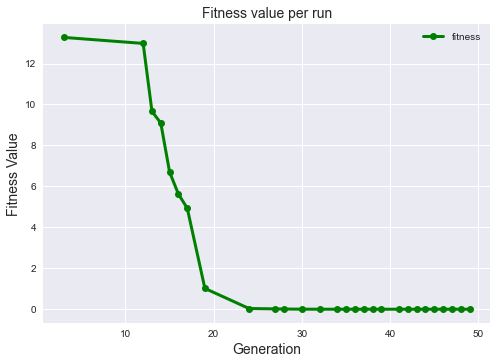

In [14]:
DE = DifferentialEvolution(30,0.5,0.7,-5.12,5.12,3)
best_fitness_ndim,fitness_val,fitness_each_iter,generation = DE.differential_evolution(50)
print("Best solution found for ",DE.dim," dimensions is --- :",best_fitness_ndim)
print("Fitness of best solution is: ",fitness_val)

plott(fitness_each_iter,generation)

Below code contains working for problem 5

In [15]:
class GeneticAlgorithm:
    def __init__(self,size,mr,cr,lower_bound,upper_bound,dim):
        self.pop_size = size
        self.P_mutation_rate = mr
        self.crossover_rate = cr
        self.dim = dim
        self.bounds = np.asarray([(lower_bound, upper_bound) for i in range(0,self.dim)]) 
    
    """function to create population of candidate solutions randomly within the specified bounds"""
    def create_initial_pop(self):
        rand_val = rand(self.pop_size, len(self.bounds))
        range_ = (self.bounds[:, 1] - self.bounds[:, 0])
        pop = self.bounds[:, 0] + (rand_val * range_)
        return pop
    
    """function to calculate fitness of individual candidiate vector from the population"""
    def calculate_indiv_fitness(self,pop_i):
        return rastrigin_function(pop_i)
    
    """function to calculate fitness of complete population"""
    def calculate_fitness(self,pop):
        allFitness = []
        for indiv_pop in pop:
            fitness = self.calculate_indiv_fitness(indiv_pop)
            allFitness.append(fitness)
        return allFitness
    
    """This function performs mutation on the population. The initial mutation rate is first selected that 
    is the phenotype mutation rate. 
    then a genotype mutation rate is selected. if that G_mutation rate is less than P_mutation rate that, then the 
    genotype gets swapped. """
    def perform_mutation(self,pop,randPopA):
        i = random.randint(0,len(randPopA)-1)
        GenemutationR = random.uniform(0, 1)
        if GenemutationR < self.P_mutation_rate:
            randPopA[i] = pop[i]
        return randPopA

    """function to create one random population for given dimension"""
    def create_one_pop(self):
        rand_val = rand(1, len(self.bounds))
        range_ = (self.bounds[:, 1] - self.bounds[:, 0])
        pop = self.bounds[:, 0] + (rand_val * range_)
        return pop[0]
    
    """function to perform mutation operation"""
    def mutation(self,p1,p2):
        #creating a random population to mutate the population with. 
        randpop = self.create_one_pop()
        #mutating both of the population
        p1 = self.perform_mutation(randpop,p1)
        p2 = self.perform_mutation(randpop,p2)
        return p1,p2 
    
    """function keep only in-bound values"""
    def check_bounds(self,mutation_result):
        updated_list = []
        for i in range(len(self.bounds)):
            #numpy.clip(a, a_min, a_max, out=None)
            #only keeping the values that are within the max and min boundaries
            new_val = np.clip(mutation_result[i], self.bounds[i, 0], self.bounds[i, 1])
            updated_list.append(mutation_result[i])
        return np.array(updated_list)
    
    """function for single point crossover"""
    def crossover(self,randPopA,randPopB):
        GenecrossoverR = random.uniform(0, 1)
        if GenecrossoverR < self.crossover_rate:
            point = random.randint(1, len(randPopA)-1)
            i = 0
            aa = []
            bb = []
            l1 = list(randPopA)
            l2 = list(randPopB)
            while i != point:
                aa.append(l1[i])
                bb.append(l2[i])
                i += 1
            while i < len(randPopA):
                aa.append(l2[i])
                bb.append(l1[i])
                i += 1
            aa = np.array(aa)
            bb = np.array(bb)
            return aa, bb
        return randPopA,randPopB
        
    
    """This Function randomly selects two individual population from the entire population
    and returns them. this technique is known as roulette wheel."""
    def roulette_wheel_selection(self,pop):
        index1 = random.randint(0, len(pop)-1 )
        index2 = random.randint(0, len(pop)-1 )
        #just to make sure that both random individuals are not the same population
        while index2 == index1:
            index2 = random.randint(0, len(pop)-1 )
        return pop[index1], pop[index2]
    
    """This function is used to add the newly created random chromosomes to the population
        This function works in a way that it first adds the chromosomes and their fitness values to the 
        population and fitness. It then sorts them in ascending order of fitness value and 
        removes the last 2 chromosomes from population,the two worst chromosome are removed"""
    def Add_Back_To_Population(self,fitA, randPopA, fitB, randPopB, fitness,Population):
        fitness.append(fitA)
        fitness.append(fitB)
        Population = list(Population)
        Population.append(randPopA)
        Population.append(randPopB)
        for i in range(0,len(fitness)):
            for j in range(0,len(fitness)-i-1):
                if fitness[j] > fitness[j+1]:
                    temp = fitness[j]
                    temp1 = Population[j]
                    fitness[j] = fitness[j+1]
                    Population[j] = Population[j+1]
                    fitness[j+1] = temp
                    Population[j+1] = temp1
        for i in range(0,2):
            fitness.pop()
            Population.pop()
        Population = np.array(Population)
        return fitness,Population
                        
    """"genetic algorithm working"""                    
    def genetic_algorithm(self,max_iter):
        # initialise list to store the fitness value and generation count for each iteration
        fitness_each_iter = []
        generation = []
        #create intial population
        pop = self.create_initial_pop()
        #evaluate fitness of initial population
        pop_fitness = self.calculate_fitness(pop)
        #The numpy.argmin() method returns indices of the min element of the array
        #get the best performing vector from the initial population
        best_indv_pop = pop[np.argmin(pop_fitness)]
        #get the minimum fitness value
        min_fitness = np.min(pop_fitness)
        iterr = 0
        #run the algorithm for the specified number of iterations
        while iterr < max_iter:
            #selecting two random population
            randPopA,randPopB= self.roulette_wheel_selection(pop)
            #applying crossover
            randPopA,randPopB = self.crossover(randPopA,randPopB)
            #applying mutation
            randPopA,randPopB = self.mutation(randPopA,randPopB)
            #checking bounds
            randPopA = self.check_bounds(randPopA)
            randPopB = self.check_bounds(randPopB)
            #calculating fitness values
            fitnessA = self.calculate_indiv_fitness(randPopA)
            fitnessB = self.calculate_indiv_fitness(randPopB)
            #if fitness of populationA is minimum
            if fitnessA < fitnessB:
                min_fitness = fitnessA
                #best pop is pop A
                best_indv_pop = randPopA
                #add to list
                fitness_each_iter.append(fitnessA)
                generation.append(iterr)
            #if fitness of populationb is minimum
            elif fitnessA > fitnessB:
                min_fitness = fitnessB
                #best pop is pop A
                best_indv_pop = randPopB
                #add to list
                fitness_each_iter.append(fitnessB)
                generation.append(iterr)
            
            #add the newly created random populations to the overall population
            pop_fitness,pop = self.Add_Back_To_Population(fitnessA,randPopA,fitnessB,randPopB,pop_fitness,pop)
            iterr += 1
        return best_indv_pop, min_fitness, fitness_each_iter,generation
    
    

Best solution found for  2  dimensions is --- : [2.08260032 2.11607399]
Fitness of best solution is:  12.675488379628103


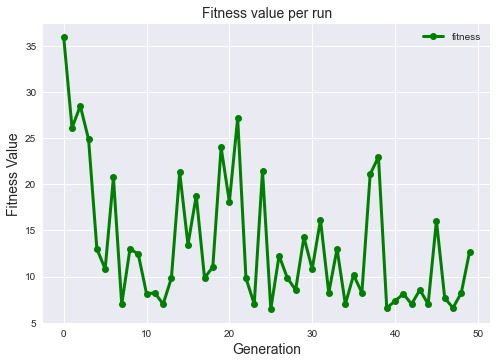

In [16]:
#(size,mutation_rate,crossover_rate,lower_bound,upper_bound,dim):
DE = GeneticAlgorithm(30,0.5,0.7,-5.12,5.12,2)
best_fitness_ndim,fitness_val,fitness_each_iter,generation = DE.genetic_algorithm(50)
print("Best solution found for ",DE.dim," dimensions is --- :",best_fitness_ndim)
print("Fitness of best solution is: ",fitness_val)
plott(fitness_each_iter,generation)